In [1]:
from qiskit import *
import numpy as np

In [2]:
from qiskit.quantum_info.operators import Operator

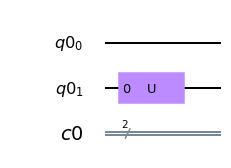

In [3]:
qr=QuantumRegister(2) # esto es un registo cuantico , un registro de qubits
cr =ClassicalRegister(2) # este es un registro clasico, un registro de bits
circuit=QuantumCircuit(qr,cr)
def BS(angulo):
    cx = Operator([
        [np.cos(angulo), 1j*np.sin(angulo)],
        [1j*np.sin(angulo), np.cos(angulo)],
    ])
    return cx
circuit.append(BS(np.pi/4), [1])
circuit.draw(output='mpl')

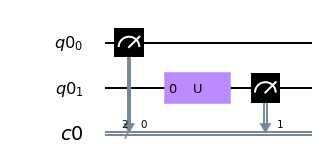

In [4]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [5]:
simulator=Aer.get_backend('qasm_simulator') #simulamos usando qasm
result=execute(circuit,backend=simulator).result()

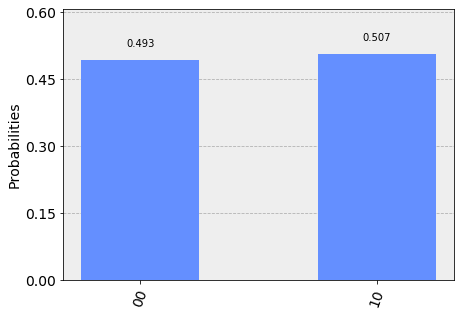

In [6]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))